In [1]:
import re
import numpy as np
import pandas as pd

In [2]:
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import gc
import time
import warnings


In [3]:
import string
import re    
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer   


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings(action='ignore') 

In [5]:
import zipfile
with zipfile.ZipFile("/content/sample_data/train.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

In [6]:
import zipfile
with zipfile.ZipFile("/content/sample_data/test.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

In [7]:
import zipfile
with zipfile.ZipFile("/content/sample_data/test_labels.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

In [8]:
# load data
train = pd.read_csv('/content/data/train.csv')
test = pd.read_csv('/content/data/train.csv')

test_labels = pd.read_csv('/content/data/test_labels.csv')

print("train data length: ", len(train))
print("test data length: ", len(test))

train data length:  159571
test data length:  159571


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [10]:
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [11]:
nrow_train=train.shape[0]
nrow_test=test.shape[0]
sum=nrow_train+nrow_test
print("       : train : test")
print("rows   :",nrow_train,":",nrow_test)
print("perc   :",round(nrow_train*100/sum),"   :",round(nrow_test*100/sum))

       : train : test
rows   : 159571 : 159571
perc   : 50    : 50


In [12]:
x=train.iloc[:,2:].sum()

rowsums=train.iloc[:,2:].sum(axis=1)
train['clean']=(rowsums==0)

train['clean'].sum()
print("Total comments = ",len(train))
print("Total clean comments = ",train['clean'].sum())
print("Total tags =",x.sum())

Total comments =  159571
Total clean comments =  143346
Total tags = 35098


In [13]:
print("Check for missing values in Train dataset")
null_check=train.isnull().sum()
print(null_check)
print("Check for missing values in Test dataset")
null_check=test.isnull().sum()
print(null_check)
print("filling NA with \"unknown\"")
train["comment_text"].fillna("unknown", inplace=True)
test["comment_text"].fillna("unknown", inplace=True)

Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64
Check for missing values in Test dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64
filling NA with "unknown"


In [14]:
print(train.isnull().value_counts())
print('-'*30)
print(train.isnull().sum())

id     comment_text  toxic  severe_toxic  obscene  threat  insult  identity_hate  clean
False  False         False  False         False    False   False   False          False    159571
dtype: int64
------------------------------
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64


In [15]:
sns.set_style("whitegrid")

In [16]:
train.tail(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
159561,ffd2e85b07b3c7e4,"""\nNo he did not, read it again (I would have ...",0,0,0,0,0,0,True
159562,ffd72e9766c09c97,"""\n Auto guides and the motoring press are not...",0,0,0,0,0,0,True
159563,ffe029a7c79dc7fe,"""\nplease identify what part of BLP applies be...",0,0,0,0,0,0,True
159564,ffe897e7f7182c90,Catalan independentism is the social movement ...,0,0,0,0,0,0,True
159565,ffe8b9316245be30,The numbers in parentheses are the additional ...,0,0,0,0,0,0,True
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,True
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,True
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,True
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,True
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0,True


In [17]:
target_cols = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']

In [18]:
print('size of train : {}'.format(len(train)))
print('size of test : {}'.format(len(test)))
print('-'*20)
print(train[target_cols].sum().sort_values(ascending=False))

size of train : 159571
size of test : 159571
--------------------
toxic            15294
obscene           8449
insult            7877
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


**EDA**

In [19]:
temp_df=train.iloc[:,2:-1]

In [20]:
main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])

In [21]:
out

severe_toxic       obscene        threat       insult        \
severe_toxic            0     1       0     1       0    1       0     1   
toxic                                                                      
0                  144277     0  143754   523  144248   29  143744   533   
1                   13699  1595    7368  7926   14845  449    7950  7344   

             identity_hate        
severe_toxic             0     1  
toxic                             
0                   144174   103  
1                    13992  1302

In [22]:
merge=pd.concat([train.iloc[:,0:2],test.iloc[:,0:2]])
df=merge.reset_index(drop=True)


In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
eng_stopwords = set(stopwords.words("english"))

In [25]:
df['count_sent']=df["comment_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)

df['count_word']=df["comment_text"].apply(lambda x: len(str(x).split()))

df['count_unique_word']=df["comment_text"].apply(lambda x: len(set(str(x).split())))

df['count_letters']=df["comment_text"].apply(lambda x: len(str(x)))

df["count_punctuations"] =df["comment_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

df["count_words_upper"] = df["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

df["count_words_title"] = df["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

df["count_stopwords"] = df["comment_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

df["mean_word_len"] = df["comment_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


In [26]:
df['word_unique_percent']=df['count_unique_word']*100/df['count_word']

df['punct_percent']=df['count_punctuations']*100/df['count_word']


In [27]:
train_feats=df.iloc[0:len(train),]
test_feats=df.iloc[len(train):,]

train_tags=train.iloc[:,2:]
train_feats=pd.concat([train_feats,train_tags],axis=1)


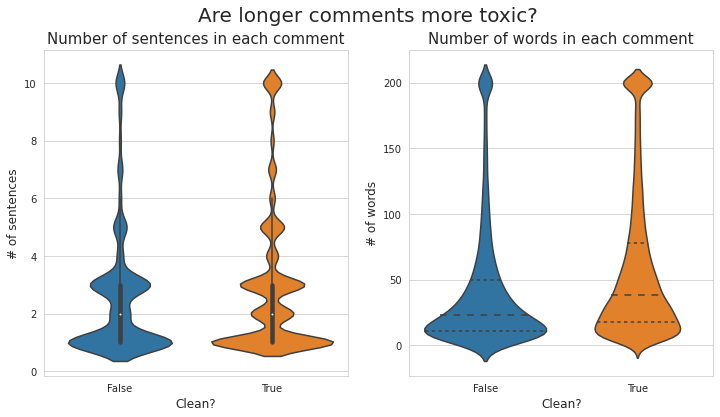

In [28]:
train_feats['count_sent'].loc[train_feats['count_sent']>10] = 10 
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.suptitle("Are longer comments more toxic?",fontsize=20)
sns.violinplot(y='count_sent',x='clean', data=train_feats,split=True)
plt.xlabel('Clean?', fontsize=12)
plt.ylabel('# of sentences', fontsize=12)
plt.title("Number of sentences in each comment", fontsize=15)

train_feats['count_word'].loc[train_feats['count_word']>200] = 200
plt.subplot(122)
sns.violinplot(y='count_word',x='clean', data=train_feats,split=True,inner="quart")
plt.xlabel('Clean?', fontsize=12)
plt.ylabel('# of words', fontsize=12)
plt.title("Number of words in each comment", fontsize=15)

plt.show()

In [29]:
train_feats['count_unique_word'].loc[train_feats['count_unique_word']>200] = 200

temp_df = pd.melt(train_feats, value_vars=['count_word', 'count_unique_word'], id_vars='clean')

spammers=train_feats[train_feats['word_unique_percent']<30]

In [30]:
import matplotlib.gridspec as gridspec 
color = sns.color_palette()

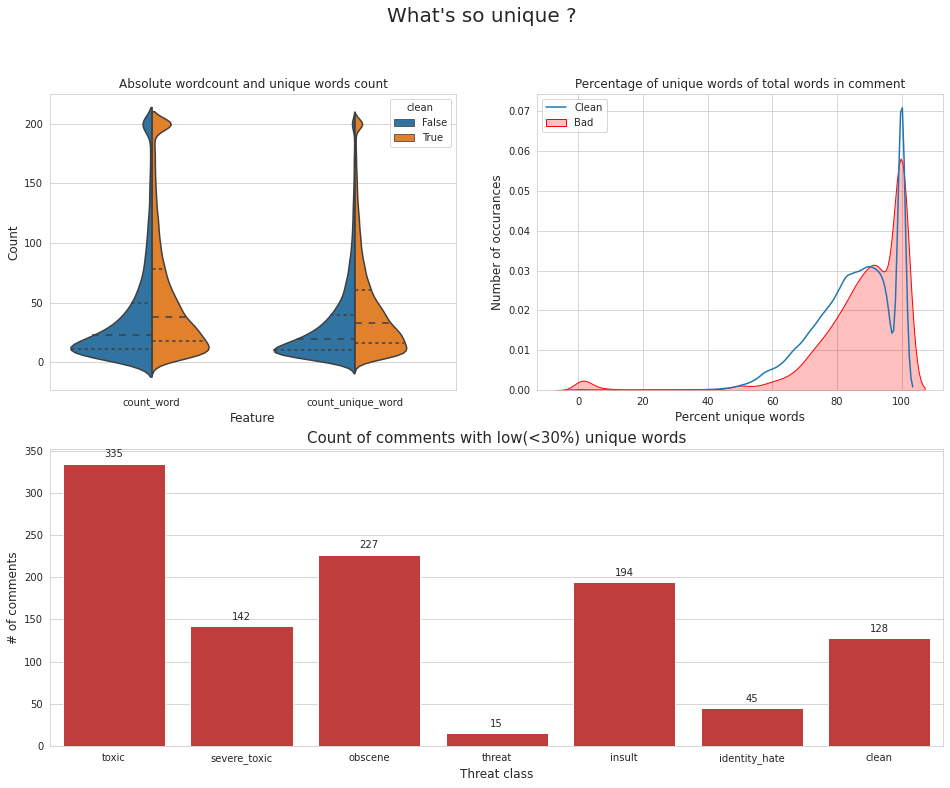

In [31]:
plt.figure(figsize=(16,12))
plt.suptitle("What's so unique ?",fontsize=20)
gridspec.GridSpec(2,2)
plt.subplot2grid((2,2),(0,0))
sns.violinplot(x='variable', y='value', hue='clean', data=temp_df,split=True,inner='quartile')
plt.title("Absolute wordcount and unique words count")
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot2grid((2,2),(0,1))
plt.title("Percentage of unique words of total words in comment")

ax=sns.kdeplot(train_feats[train_feats.clean == 0].word_unique_percent, label="Bad",shade=True,color='r')
ax=sns.kdeplot(train_feats[train_feats.clean == 1].word_unique_percent, label="Clean")
plt.legend()
plt.ylabel('Number of occurances', fontsize=12)
plt.xlabel('Percent unique words', fontsize=12)
x=spammers.iloc[:,-7:].sum()
plt.subplot2grid((2,2),(1,0),colspan=2)
plt.title("Count of comments with low(<30%) unique words",fontsize=15)
ax=sns.barplot(x=x.index, y=x.values,color=color[3])


rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.xlabel('Threat class', fontsize=12)
plt.ylabel('# of comments', fontsize=12)
plt.show()

In [32]:
train['sum_harmful'] = 0
for col in target_cols:
    train['sum_harmful'] += train[col]
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,sum_harmful
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True,0


In [33]:
train['len_of_text'] = train['comment_text'].apply(len)

In [34]:
print(train['len_of_text'])

0         264
1         112
2         233
3         622
4          67
         ... 
159566    295
159567     99
159568     81
159569    116
159570    189
Name: len_of_text, Length: 159571, dtype: int64


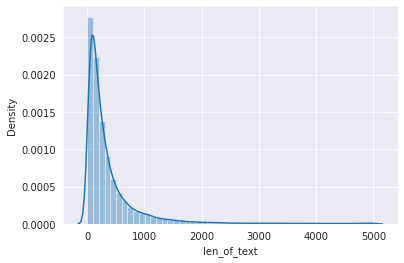

In [35]:
sns.set_style("darkgrid")
sns.distplot(train['len_of_text'],kde=True)
plt.show()

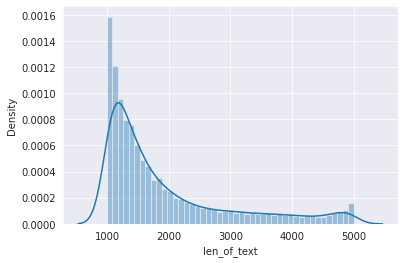

In [36]:
x = train.loc[train['len_of_text'] > 1000,'len_of_text']
sns.distplot(x,kde=True)
plt.show()

0    12521
1      419
3      146
2      128
4      121
5       23
6        2
Name: sum_harmful, dtype: int64


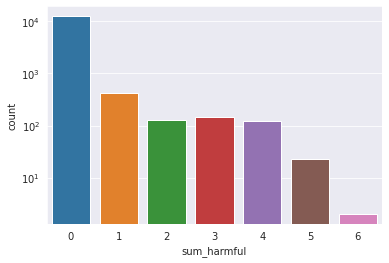

In [37]:
print(train.loc[train['len_of_text'] > 1000,'sum_harmful'].value_counts())

plt.yscale('log')
display(sns.countplot(train.loc[train['len_of_text'] > 1000,'sum_harmful']))

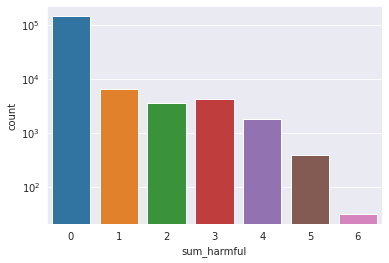

In [38]:
plt.yscale('log')
sns.countplot(train['sum_harmful'])
plt.show()

In [39]:
train['sum_harmful']

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: sum_harmful, Length: 159571, dtype: int64

In [40]:
train['sum_harmful'].value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: sum_harmful, dtype: int64

In [41]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum_harmful,len_of_text
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.219952,394.073221
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.748260,590.720282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,435.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5000.000000


In [42]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [43]:
train['preprocess_text'] = train['comment_text'].apply(clean_text)
train.head(3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,sum_harmful,len_of_text,preprocess_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True,0,264,explanation why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True,0,112,d aww he matches this background colour i am s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True,0,233,hey man i am really not trying to edit war it ...


In [44]:
from nltk.corpus import stopwords

In [45]:
corpus=merge.comment_text

In [46]:
from nltk.tokenize import TweetTokenizer 
tokenizer=TweetTokenizer()

In [47]:
from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()

In [48]:
APPO = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"
}

In [49]:
def clean(comment):

    comment=comment.lower()
    
    comment=re.sub("\\n","",comment)
    
    comment=re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}","",comment)
    
    comment=re.sub("\[\[.*\]","",comment)
    
    
    words=tokenizer.tokenize(comment)
    

    words=[APPO[word] if word in APPO else word for word in words]
    words=[lem.lemmatize(word, "v") for word in words]
    words = [w for w in words if not w in eng_stopwords]
    clean_sent=" ".join(words)
    
    return(clean_sent)


In [50]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [51]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [52]:
start_time=time.time()

In [53]:
clean_corpus=corpus.apply(lambda x :clean(x))

end_time=time.time()
print("total time till Cleaning",end_time-start_time)

total time till Cleaning 236.76780247688293


In [54]:
cv = CountVectorizer() 

documents = train.comment_text.tolist()
documents = [' '.join(documents)] 

X = cv.fit_transform(documents).toarray()
freqs = X.transpose().flatten() 

# Array mapping from feature integer indices to feature name.
words = cv.get_feature_names() 
print(words)

df_word = pd.DataFrame({'word': words, 'freq': freqs})
df_word = df_word.sort_values(by='freq', ascending=False)

df_word = df_word.reset_index().drop(['index'],axis=1)
df_word[:10]

['00', '000', '0000', '00000', '000000', '0000000', '00000000', '0000000027', '00000001', '00000003', '00000050', '000001', '000002', '000002000004000008000016', '0000030422', '0000035', '000023405011', '00004', '000045', '00007632', '000080', '00008b', '00009c', '0000z', '0001', '000111002', '00012', '000131088', '0002tree', '0003', '000319821', '00033', '00035', '000352', '00037', '00038', '0003º', '0004', '000500', '00052', '00053', '0006', '00075', '00098', '000_bucks', '000b01c5b9f8', '000feet', '000ft', '000http', '000hz', '000k', '000kg', '000km', '000lb', '000poland2', '000s', '000shp', '000soviet', '000th', '000unknownunknown', '000unknownunknownhungary', '000unknownunknownitaly', '000unknownunknownromania3', '000unknownunknowntotal', '000v', '000x', '000z', '001', '0010', '00107', '0010steve', '0011', '001200405140111', '00122', '00136hg', '0014', '00144feab7de', '0015', '00151', '0016', '00164', '0017', '00175', '0018', '001811', '00184', '002', '0020143', '0022', '00223', '

,word,freq
0,the,496796
1,to,297408
2,of,224547
3,and,224092
4,you,218308
5,is,176405
6,that,160867
7,it,148644
8,in,145477
9,for,102723


In [55]:
stopwords_list = df_word.word.tolist()[:70]
print('stop words list',len(stopwords_list))
print(stopwords_list[:70],'...')


from nltk.corpus import stopwords
stopwords_list+=stopwords.words('english')
stopwords = set(stopwords_list)
print(' ')
print("stopwords len : ", len(stopwords))

stop words list 70
['the', 'to', 'of', 'and', 'you', 'is', 'that', 'it', 'in', 'for', 'this', 'not', 'on', 'be', 'as', 'have', 'are', 'your', 'with', 'if', 'article', 'was', 'or', 'but', 'wikipedia', 'page', 'my', 'an', 'from', 'by', 'do', 'can', 'at', 'me', 'about', 'talk', 'so', 'what', 'there', 'all', 'has', 'will', 'please', 'no', 'would', 'they', 'he', 'one', 'like', 'just', 'we', 'which', 'any', 'been', 'should', 'don', 'more', 'some', 'other', 'here', 'who', 'see', 'also', 'his', 'think', 'because', 'know', 'how', 'people', 'am'] ...
 
stopwords len :  192


In [56]:
from nltk.tokenize import word_tokenize


def remove_stopwords(text):
    stopwords_list = stopwords
    word_tokens = word_tokenize(text)
    result = []
    for w in word_tokens:
        if len(w)>2 and w not in stopwords_list:
            result.append(w)
    return ' '.join(result)


def remove_special(text, lower=True):
    if lower:
        text = text.lower()
    text = re.sub("[^a-zA-Z]", " ", text)
    text = " ".join(
        text.split()
    )
    return text

def remove_repeat(text, repeat=1):
    text = text.split(' ')
    result = []
    for word in text:
        if result.count(word)<repeat:
            result.append(word)
    return ' '.join(result)



In [57]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [58]:
train['preprocess_text'] = train['preprocess_text'].apply(remove_special)
train['preprocess_text'] = train['preprocess_text'].apply(remove_stopwords)


In [59]:
test['preprocess_text'] = test['comment_text'].apply(clean_text)
test['preprocess_text'] = test['preprocess_text'].apply(remove_special)
test['preprocess_text'] = test['preprocess_text'].apply(remove_stopwords)

count    159571.000000
mean         31.193506
std          49.602668
min           1.000000
25%           7.000000
50%          16.000000
75%          34.000000
max        1250.000000
Name: preprocess_text, dtype: float64


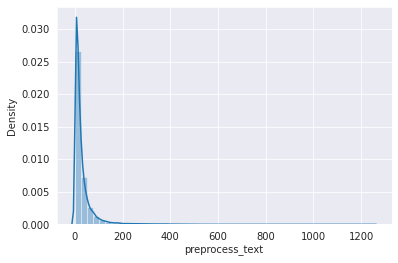

In [60]:
def num_of_word(text):
    return len(text.split(' '))

tmp = train['preprocess_text'].apply(num_of_word)
print(tmp.describe())
sns.distplot(tmp)

In [61]:
train['num_of_word'] = train['preprocess_text'].apply(num_of_word)
display(train[(train['num_of_word'] > 500)&(train['num_of_word'] < 1000)].head(3))
display(train[train['num_of_word'] > 1000])

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,sum_harmful,len_of_text,preprocess_text,num_of_word
2420,067c5e814e88a56b,FUCK YOU U USELESS BOT FUCK YOU U USELESS BOT ...,1,1,1,0,1,0,False,4,4999,fuck useless bot fuck useless bot fuck useless...,652
4174,0b2055f13934a41e,ii CAN STILL POST WITH THIS COMPUTER...I SAID ...,1,0,1,0,1,0,False,3,5000,still post computer said block come fuck arres...,520
4712,0c7c341727488579,do go fuck off bastard\nDo Yyou Have a life?\n...,1,1,1,1,1,0,False,5,4969,fuck bastard yyou life fuck bastard yank cock ...,700


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,sum_harmful,len_of_text,preprocess_text,num_of_word
6572,118e2e7cd2b30188,Sex sex sex sex Sex sex sex sexSex sex sex sex...,1,0,0,0,0,0,False,1,4999,sex sex sex sex sex sex sex sexsex sex sex sex...,1001
32143,5572234220e43ea2,PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PI...,1,0,0,0,0,0,False,1,4999,pig pig pig pig pig pig pig pig pig pig pig pi...,1250
32400,56311e1c0b2cbb52,THAT WAS REALLY MILLESECONDS WASNT IT BITCH \n...,1,0,1,0,1,1,False,4,4981,really milleseconds wasnt bitch fat jew fat je...,1235
76598,cd135d9358a9e9ea,DIE FAG DIE FAG DIE FAG DIE FAG DIE FAG DIE FA...,1,0,0,0,0,0,False,1,4999,die fag die fag die fag die fag die fag die fa...,1250
150039,65d66bf057752682,LOL LOL LOL LOL LOL LOL LOL LOL LOL LOL LOL LO...,0,0,0,0,0,0,True,0,4999,lol lol lol lol lol lol lol lol lol lol lol lo...,1250
153353,9bb20c51c9fec236,FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JE...,1,0,0,0,1,1,False,3,4999,fat jew fat jew fat jew fat jew fat jew fat je...,1247


In [62]:
train['remove_repeat'] = train['preprocess_text'].apply(remove_repeat)
test['remove_repeat'] = test['preprocess_text'].apply(remove_repeat)

display(train.head(3))
display(test.head(3))

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,sum_harmful,len_of_text,preprocess_text,num_of_word,remove_repeat
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True,0,264,explanation edits made username hardcore metal...,20,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True,0,112,aww matches background colour seemingly stuck ...,9,aww matches background colour seemingly stuck ...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True,0,233,hey man really trying edit war guy constantly ...,19,hey man really trying edit war guy constantly ...


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,preprocess_text,remove_repeat
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,aww matches background colour seemingly stuck ...,aww matches background colour seemingly stuck ...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man really trying edit war guy constantly ...,hey man really trying edit war guy constantly ...


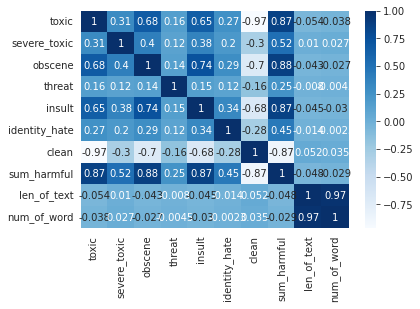

In [63]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix, cmap='Blues',annot=True)
plt.show()

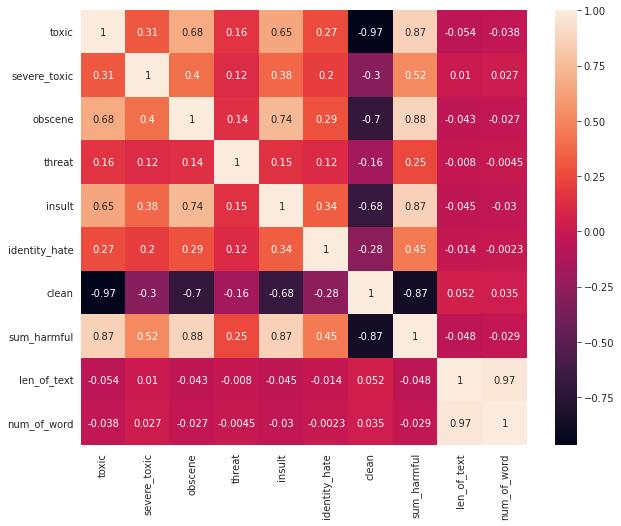

In [64]:
corr=train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [65]:
def top_tfidf_feats(row, features, top_n=25):
    
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

def top_mean_feats(Xtr, features, grp_ids, min_tfidf=0.1, top_n=25):
    
    
    D = Xtr[grp_ids].toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)
    
def top_feats_by_class(Xtr, features, min_tfidf=0.1, top_n=20):
    dfs = []
    cols=train_tags.columns
    for col in cols:
        ids = train_tags.index[train_tags[col]==1]
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [66]:
tfv = TfidfVectorizer(min_df=150,  max_features=30000, 
            strip_accents='unicode', analyzer='word',ngram_range=(2,2),
            use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

tfv.fit(clean_corpus)
features = np.array(tfv.get_feature_names())
train_bigrams =  tfv.transform(clean_corpus.iloc[:train.shape[0]])
test_bigrams = tfv.transform(clean_corpus.iloc[train.shape[0]:])
#get top n for bigrams
tfidf_top_n_per_lass=top_feats_by_class(train_bigrams,features)

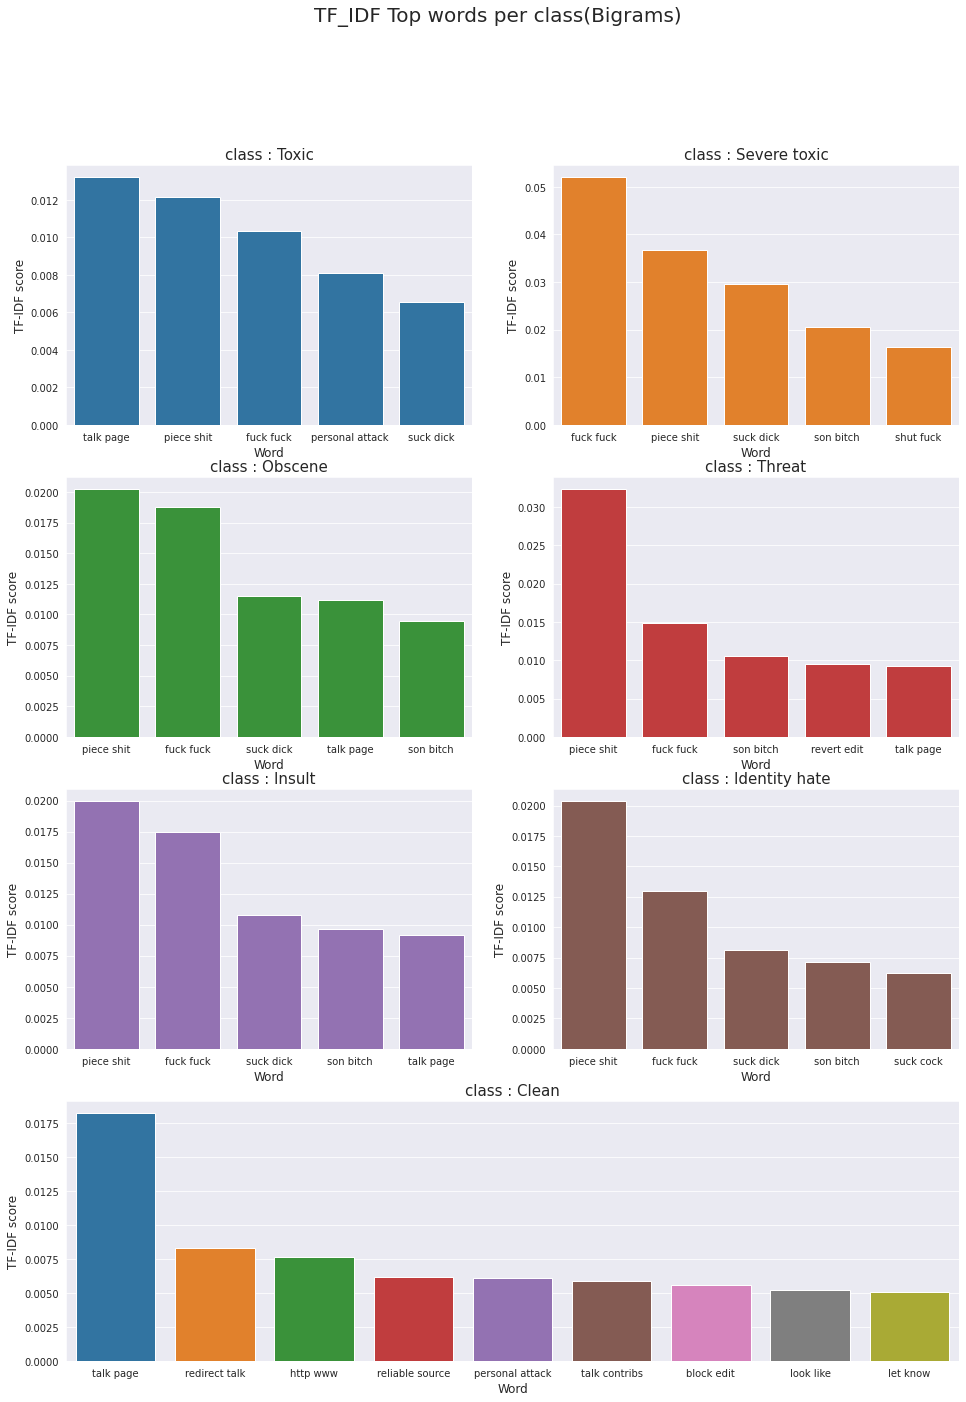

In [67]:
plt.figure(figsize=(16,22))
plt.suptitle("TF_IDF Top words per class(Bigrams)",fontsize=20)
gridspec.GridSpec(4,2)
plt.subplot2grid((4,2),(0,0))
sns.barplot(tfidf_top_n_per_lass[0].feature.iloc[0:5],tfidf_top_n_per_lass[0].tfidf.iloc[0:5],color=color[0])
plt.title("class : Toxic",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)

plt.subplot2grid((4,2),(0,1))
sns.barplot(tfidf_top_n_per_lass[1].feature.iloc[0:5],tfidf_top_n_per_lass[1].tfidf.iloc[0:5],color=color[1])
plt.title("class : Severe toxic",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)


plt.subplot2grid((4,2),(1,0))
sns.barplot(tfidf_top_n_per_lass[2].feature.iloc[0:5],tfidf_top_n_per_lass[2].tfidf.iloc[0:5],color=color[2])
plt.title("class : Obscene",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)

plt.subplot2grid((4,2),(1,1))
sns.barplot(tfidf_top_n_per_lass[3].feature.iloc[0:5],tfidf_top_n_per_lass[3].tfidf.iloc[0:5],color=color[3])
plt.title("class : Threat",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)


plt.subplot2grid((4,2),(2,0))
sns.barplot(tfidf_top_n_per_lass[4].feature.iloc[0:5],tfidf_top_n_per_lass[4].tfidf.iloc[0:5],color=color[4])
plt.title("class : Insult",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)


plt.subplot2grid((4,2),(2,1))
sns.barplot(tfidf_top_n_per_lass[5].feature.iloc[0:5],tfidf_top_n_per_lass[5].tfidf.iloc[0:5],color=color[5])
plt.title("class : Identity hate",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)

plt.subplot2grid((4,2),(3,0),colspan=2)
sns.barplot(tfidf_top_n_per_lass[6].feature.iloc[0:9],tfidf_top_n_per_lass[6].tfidf.iloc[0:9])
plt.title("class : Clean",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)

plt.show()


In [68]:
#TFIDF vectorization
preprocess_text = train.preprocess_text

vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(preprocess_text)
y = train[target_cols]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

print('X_train len: ', X_train.shape[0])
print('X_valid len:  ',  X_valid.shape[0])

X_train len:  127656
X_valid len:   31915


In [69]:
from collections import defaultdict
accuracy_data = defaultdict(list)
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model = LogisticRegression()
    model.fit(X_train,y)
    y_pred = model.predict(X_valid)
    print('Testing accuracy is {}'.format(round(accuracy_score(y_valid[col], y_pred),5)))
    accuracy_data[col].append(round(accuracy_score(y_valid[col], y_pred),5))

 
----prediction of toxic column----
 
Testing accuracy is 0.9571
 
----prediction of severe_toxic column----
 
Testing accuracy is 0.99
 
----prediction of obscene column----
 
Testing accuracy is 0.97735
 
----prediction of threat column----
 
Testing accuracy is 0.99727
 
----prediction of insult column----
 
Testing accuracy is 0.97026
 
----prediction of identity_hate column----
 
Testing accuracy is 0.99201


In [70]:
remove_repeat_text = train.remove_repeat

vectorizer2 = TfidfVectorizer(max_features=5000)

X2 = vectorizer2.fit_transform(remove_repeat_text)
y = train[target_cols]

X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X2, y, test_size=0.2, random_state=0)

print('X_train len: ', X_train2.shape[0])
print('X_valid len:  ',  X_valid2.shape[0])

X_train len:  127656
X_valid len:   31915


In [71]:
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train2[col]
    model2 = LogisticRegression()
    model2.fit(X_train2,y)
    y_pred2 = model.predict(X_valid2)
    print('Testing accuracy is {}'.format(round(accuracy_score(y_valid2[col], y_pred2),5)))
    accuracy_data[col].append(round(accuracy_score(y_valid2[col], y_pred2),5))


 
----prediction of toxic column----
 
Testing accuracy is 0.90243
 
----prediction of severe_toxic column----
 
Testing accuracy is 0.98916
 
----prediction of obscene column----
 
Testing accuracy is 0.94633
 
----prediction of threat column----
 
Testing accuracy is 0.99662
 
----prediction of insult column----
 
Testing accuracy is 0.94952
 
----prediction of identity_hate column----
 
Testing accuracy is 0.99013


In [72]:
tmp = pd.DataFrame(accuracy_data, index=['allow_rep','remove_rep'])
tmp


,toxic,severe_toxic,obscene,threat,insult,identity_hate
allow_rep,0.95710,0.99000,0.97735,0.99727,0.97026,0.99201
remove_rep,0.90243,0.98916,0.94633,0.99662,0.94952,0.99013


In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
from collections import defaultdict
accuracy_data = defaultdict(list)
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model1 = KNeighborsClassifier(n_neighbors=3)
    model1.fit(X_train,y)
    y_pred = model1.predict(X_valid)
    print('Testing accuracy is {}'.format(round(accuracy_score(y_valid[col], y_pred),5)))
    accuracy_data[col].append(round(accuracy_score(y_valid[col], y_pred),5))

 
----prediction of toxic column----
 
Testing accuracy is 0.92869
 
----prediction of severe_toxic column----
 
Testing accuracy is 0.98894
 
----prediction of obscene column----
 
Testing accuracy is 0.96199
 
----prediction of threat column----
 
Testing accuracy is 0.99693
 
----prediction of insult column----
 
Testing accuracy is 0.96033
 
----prediction of identity_hate column----
 
Testing accuracy is 0.99113


In [75]:
remove_repeat_text = train.remove_repeat

vectorizer2 = TfidfVectorizer(max_features=5000)

X2 = vectorizer2.fit_transform(remove_repeat_text)
y = train[target_cols]

X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X2, y, test_size=0.2, random_state=0)

print('X_train len: ', X_train2.shape[0])
print('X_valid len:  ',  X_valid2.shape[0])

X_train len:  127656
X_valid len:   31915


In [76]:
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train2[col]
    model12 = KNeighborsClassifier(n_neighbors=3)
    model12.fit(X_train2,y)
    y_pred2 = model12.predict(X_valid2)
    print('Testing accuracy is {}'.format(round(accuracy_score(y_valid2[col], y_pred2),5)))
    accuracy_data[col].append(round(accuracy_score(y_valid2[col], y_pred2),5))


 
----prediction of toxic column----
 
Testing accuracy is 0.92605
 
----prediction of severe_toxic column----
 
Testing accuracy is 0.98888
 
----prediction of obscene column----
 
Testing accuracy is 0.96102
 
----prediction of threat column----
 
Testing accuracy is 0.99693
 
----prediction of insult column----
 
Testing accuracy is 0.95942
 
----prediction of identity_hate column----
 
Testing accuracy is 0.99079


In [77]:
tmp = pd.DataFrame(accuracy_data, index=['allow_rep','remove_rep'])
tmp


,toxic,severe_toxic,obscene,threat,insult,identity_hate
allow_rep,0.92869,0.98894,0.96199,0.99693,0.96033,0.99113
remove_rep,0.92605,0.98888,0.96102,0.99693,0.95942,0.99079


In [78]:
from sklearn import tree

In [79]:
from collections import defaultdict
accuracy_data = defaultdict(list)
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model1 = KNeighborsClassifier(n_neighbors=3)
    model1.fit(X_train,y)
    y_pred = model1.predict(X_valid)
    print('Testing accuracy is {}'.format(round(accuracy_score(y_valid[col], y_pred),5)))
    accuracy_data[col].append(round(accuracy_score(y_valid[col], y_pred),5))

 
----prediction of toxic column----
 
Testing accuracy is 0.92869
 
----prediction of severe_toxic column----
 
Testing accuracy is 0.98894
 
----prediction of obscene column----
 
Testing accuracy is 0.96199
 
----prediction of threat column----
 
Testing accuracy is 0.99693
 
----prediction of insult column----
 
Testing accuracy is 0.96033
 
----prediction of identity_hate column----
 
Testing accuracy is 0.99113


In [80]:
remove_repeat_text = train.remove_repeat

vectorizer2 = TfidfVectorizer(max_features=5000)

X2 = vectorizer2.fit_transform(remove_repeat_text)
y = train[target_cols]

X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X2, y, test_size=0.2, random_state=0)


In [81]:
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train2[col]
    model12 = KNeighborsClassifier(n_neighbors=3)
    model12.fit(X_train2,y)
    y_pred2 = model12.predict(X_valid2)
    print('Testing accuracy is {}'.format(round(accuracy_score(y_valid2[col], y_pred2),5)))
    accuracy_data[col].append(round(accuracy_score(y_valid2[col], y_pred2),5))


 
----prediction of toxic column----
 
Testing accuracy is 0.92605
 
----prediction of severe_toxic column----
 
Testing accuracy is 0.98888
 
----prediction of obscene column----
 
Testing accuracy is 0.96102
 
----prediction of threat column----
 
Testing accuracy is 0.99693
 
----prediction of insult column----
 
Testing accuracy is 0.95942
 
----prediction of identity_hate column----
 
Testing accuracy is 0.99079


In [82]:
tmp = pd.DataFrame(accuracy_data, index=['allow_rep','remove_rep'])
tmp


,toxic,severe_toxic,obscene,threat,insult,identity_hate
allow_rep,0.92869,0.98894,0.96199,0.99693,0.96033,0.99113
remove_rep,0.92605,0.98888,0.96102,0.99693,0.95942,0.99079


In [83]:
from sklearn.svm import SVC

In [84]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [86]:
from collections import defaultdict
accuracy_data = defaultdict(list)
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model1 = make_pipeline(StandardScaler(with_mean=False), SVC(gamma='auto'))
    model1.fit(X_train,y)
    y_pred = model1.predict(X_valid)
    print('Testing accuracy is {}'.format(round(accuracy_score(y_valid[col], y_pred),5)))
    accuracy_data[col].append(round(accuracy_score(y_valid[col], y_pred),5))

 
----prediction of toxic column----
 
Testing accuracy is 0.95115
 
----prediction of severe_toxic column----
 
Testing accuracy is 0.98988
 
----prediction of obscene column----
 
Testing accuracy is 0.97412
 
----prediction of threat column----
 
Testing accuracy is 0.99721
 
----prediction of insult column----
 
Testing accuracy is 0.96829
 
----prediction of identity_hate column----
 
Testing accuracy is 0.99173


In [87]:
remove_repeat_text = train.remove_repeat

vectorizer2 = TfidfVectorizer(max_features=5000)

X2 = vectorizer2.fit_transform(remove_repeat_text)
y = train[target_cols]

X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X2, y, test_size=0.2, random_state=0)


In [88]:
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train2[col]
    model12 = make_pipeline(StandardScaler(with_mean=False), SVC(gamma='auto'))
    model12.fit(X_train2,y)
    y_pred2 = model12.predict(X_valid2)
    print('Testing accuracy is {}'.format(round(accuracy_score(y_valid2[col], y_pred2),5)))
    accuracy_data[col].append(round(accuracy_score(y_valid2[col], y_pred2),5))


 
----prediction of toxic column----
 
Testing accuracy is 0.95118
 
----prediction of severe_toxic column----
 
Testing accuracy is 0.98975
 
----prediction of obscene column----
 
Testing accuracy is 0.9749
 
----prediction of threat column----
 
Testing accuracy is 0.99721
 
----prediction of insult column----
 
Testing accuracy is 0.96813
 
----prediction of identity_hate column----
 
Testing accuracy is 0.99132


In [89]:
tmp = pd.DataFrame(accuracy_data, index=['allow_rep','remove_rep'])
tmp


,toxic,severe_toxic,obscene,threat,insult,identity_hate
allow_rep,0.95115,0.98988,0.97412,0.99721,0.96829,0.99173
remove_rep,0.95118,0.98975,0.97490,0.99721,0.96813,0.99132
